<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BFS Search Result: ('X Wins', 1123)
DFS Search Result: ('X Wins', 1)
A* Search Result: ('X Wins', 1)


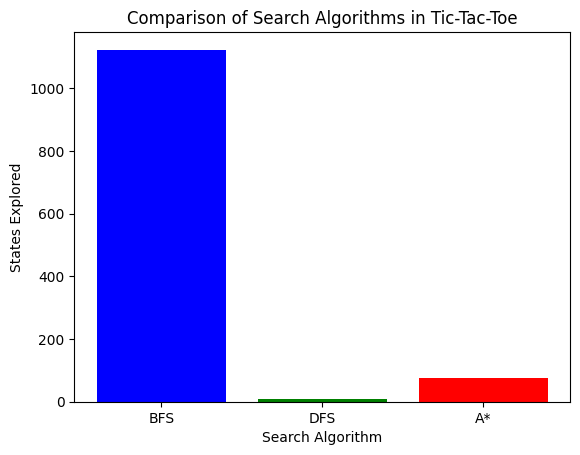

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import heapq
from collections import deque

# Tic-Tac-Toe Board Representation
class TicTacToe:
    def __init__(self):
        self.board = np.full((3, 3), ' ')

    def display(self):
        for row in self.board:
            print("|".join(row))
            print("-" * 5)

    def is_winner(self, player):
        # Check rows, columns, and diagonals
        for i in range(3):
            if all(self.board[i, j] == player for j in range(3)) or \
               all(self.board[j, i] == player for j in range(3)):
                return True
        if all(self.board[i, i] == player for i in range(3)) or \
           all(self.board[i, 2 - i] == player for i in range(3)):
            return True
        return False

    def is_draw(self):
        return all(self.board[i, j] != ' ' for i in range(3) for j in range(3))

    def get_available_moves(self):
        return [(i, j) for i in range(3) for j in range(3) if self.board[i, j] == ' ']

    def make_move(self, i, j, player):
        if self.board[i, j] == ' ':
            self.board[i, j] = player
            return True
        return False

    def undo_move(self, i, j):
        self.board[i, j] = ' '

# BFS Search Algorithm
def bfs_search(game, start_player):
    queue = deque([(game.board.copy(), start_player)])
    visited = set()
    explored_states = 0

    while queue:
        board, player = queue.popleft()
        explored_states += 1
        game.board = board.copy()

        if game.is_winner('X'):
            return "X Wins", explored_states
        if game.is_winner('O'):
            return "O Wins", explored_states
        if game.is_draw():
            return "Draw", explored_states

        for move in game.get_available_moves():
            i, j = move
            new_board = board.copy()
            new_board[i, j] = player
            board_tuple = tuple(map(tuple, new_board))

            if board_tuple not in visited:
                visited.add(board_tuple)
                queue.append((new_board, 'X' if player == 'O' else 'O'))

    return "No Result", explored_states

# DFS Search Algorithm
def dfs_search(game, start_player):
    stack = [(game.board.copy(), start_player)]
    visited = set()
    explored_states = 0

    while stack:
        board, player = stack.pop()
        explored_states += 1
        game.board = board.copy()

        if game.is_winner('X'):
            return "X Wins", explored_states
        if game.is_winner('O'):
            return "O Wins", explored_states
        if game.is_draw():
            return "Draw", explored_states

        for move in game.get_available_moves():
            i, j = move
            new_board = board.copy()
            new_board[i, j] = player
            board_tuple = tuple(map(tuple, new_board))

            if board_tuple not in visited:
                visited.add(board_tuple)
                stack.append((new_board, 'X' if player == 'O' else 'O'))

    return "No Result", explored_states

# Heuristic Function for A* (Favor moves that lead to a win faster)
def heuristic(board, player):
    score = 0
    for i in range(3):
        row = board[i, :]
        col = board[:, i]
        score += (row.tolist().count(player) - row.tolist().count('O' if player == 'X' else 'X'))
        score += (col.tolist().count(player) - col.tolist().count('O' if player == 'X' else 'X'))

    diag1 = [board[i, i] for i in range(3)]
    diag2 = [board[i, 2 - i] for i in range(3)]
    score += (diag1.count(player) - diag1.count('O' if player == 'X' else 'X'))
    score += (diag2.count(player) - diag2.count('O' if player == 'X' else 'X'))

    return score

# A* Search Algorithm
def a_star_search(game, start_player):
    pq = []
    heapq.heappush(pq, (0, tuple(map(tuple, game.board.copy())), start_player))
    visited = set()
    explored_states = 0

    while pq:
        _, board_tuple, player = heapq.heappop(pq)
        explored_states += 1
        board = np.array(board_tuple)
        game.board = board.copy()

        if game.is_winner('X'):
            return "X Wins", explored_states
        if game.is_winner('O'):
            return "O Wins", explored_states
        if game.is_draw():
            return "Draw", explored_states

        for move in game.get_available_moves():
            i, j = move
            new_board = board.copy()
            new_board[i, j] = player
            new_board_tuple = tuple(map(tuple, new_board))

            if new_board_tuple not in visited:
                visited.add(new_board_tuple)
                h = heuristic(new_board, player)
                heapq.heappush(pq, (h, new_board_tuple, 'X' if player == 'O' else 'O'))

    return "No Result", explored_states


# Visualization
def visualize_results():
    algorithms = ["BFS", "DFS", "A*"]
    explored_states = []

    for algo in [bfs_search, dfs_search, a_star_search]:
        game = TicTacToe()
        _, states = algo(game, 'X')
        explored_states.append(states)

    plt.bar(algorithms, explored_states, color=['blue', 'green', 'red'])
    plt.xlabel("Search Algorithm")
    plt.ylabel("States Explored")
    plt.title("Comparison of Search Algorithms in Tic-Tac-Toe")
    plt.show()

# Running the game and visualization
game = TicTacToe()
print("BFS Search Result:", bfs_search(game, 'X'))
print("DFS Search Result:", dfs_search(game, 'X'))
print("A* Search Result:", a_star_search(game, 'X'))

visualize_results()
